In [1]:
import pandas as pd

df = pd.read_csv('../R_Logit_Models/Mode Choice Models/MChInput_2015_withColumns_2.4.csv')
df.head()

,Level,Status,Mode,Gender,Licence,Work,Car_Avail,Family,Cars,Children,Adults,Income,Time.Auto,Time.Transit,Time.Active
0,UG,FT,Transit,Female,0,Other,0,Family,1,3,4,Unknown,17.474220,75.468478,223.214700
1,Grad,FT,Active,Female,1,Other,0,Other,0,0,2,High,2.924953,24.128386,16.985265
2,UG,FT,Transit,Female,1,Other,1,Family,1,0,4,Unknown,50.171880,155.551170,349.788450
3,UG,FT,Active,Male,1,Other,1,Roommates,0,0,4,Unknown,1.049121,16.675728,10.491210
4,Grad,FT,Active,Male,1,Other,0,Other,0,0,2,Low,2.924953,24.128386,16.985265


In [2]:
y = df['Mode']
x = df.drop(columns = ['Mode', 'Car_Avail'])
x = pd.get_dummies(x)
# x = df[['Time.Transit', 'Time.Auto', 'Time.Active']]
x.head()

,Licence,Cars,Children,Adults,Time.Auto,Time.Transit,Time.Active,Level_Grad,Level_Other,Level_UG,...,Gender_Other,Work_FT,Work_Other,Work_PT,Family_Family,Family_Other,Family_Roommates,Income_High,Income_Low,Income_Unknown
0,0,1,3,4,17.474220,75.468478,223.214700,0,0,1,...,0,0,1,0,1,0,0,0,0,1
1,1,0,0,2,2.924953,24.128386,16.985265,1,0,0,...,0,0,1,0,0,1,0,1,0,0
2,1,1,0,4,50.171880,155.551170,349.788450,0,0,1,...,0,0,1,0,1,0,0,0,0,1
3,1,0,0,4,1.049121,16.675728,10.491210,0,0,1,...,0,0,1,0,0,0,1,0,0,1
4,1,0,0,2,2.924953,24.128386,16.985265,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [3]:
list(df.columns)

['Level',
 'Status',
 'Mode',
 'Gender',
 'Licence',
 'Work',
 'Car_Avail',
 'Family',
 'Cars',
 'Children',
 'Adults',
 'Income',
 'Time.Auto',
 'Time.Transit',
 'Time.Active']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [5]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [6]:
print("Accuracy:", rf.score(X_test, y_test))
pd.Series(rf.feature_importances_, index = x.columns).sort_values(ascending=False)

Accuracy: 0.8235962718799728


Time.Active         0.258902
Time.Auto           0.246385
Time.Transit        0.197995
Adults              0.046584
Cars                0.043688
Family_Family       0.042636
Children            0.021608
Licence             0.020068
Family_Roommates    0.014060
Income_Unknown      0.011453
Gender_Male         0.010723
Gender_Female       0.010446
Income_Low          0.010176
Level_Grad          0.009186
Level_UG            0.008344
Family_Other        0.007622
Income_High         0.007575
Work_Other          0.007002
Work_PT             0.006221
Status_PT           0.005572
Status_FT           0.005481
Work_FT             0.004121
Level_Other         0.001424
Status_Other        0.001380
Gender_Other        0.001348
dtype: float64

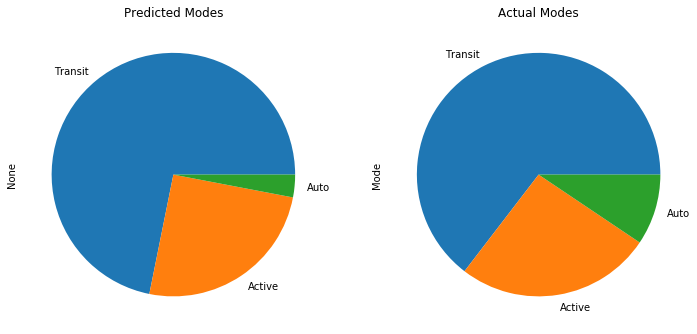

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 12))
plt.tight_layout()
plt.subplot(1, 2, 1)
pd.Series(y_pred).value_counts().plot.pie()
plt.title("Predicted Modes")
plt.subplot(1, 2, 2)
pd.Series(y_test).value_counts().plot.pie()
plt.title("Actual Modes")
plt.show()

In [8]:
probs = rf.predict_proba(X_test)
modes = list(rf.classes_)
results = pd.concat((y_test.reset_index(drop=True), pd.DataFrame(probs)), axis=1)
results.apply(lambda x: x[modes.index(x.Mode)], axis=1).mean()

0.7553553010588571

In [9]:
import pickle
pickle.dump(rf, open('Mode_Choice_Model', 'wb'))

# To open:
# model = pickle.load(open(filename, 'rb'))